# Quickstart tutorial
This tutorial quickly shows you the data manipulation and visualization that this package is capable of. Most plots take just a few function calls to generate. Study the other tutorials for more in-depth explanations of how to use the functions we provide.

In [1]:
import covid19pandas as cod
global_df = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


# Cumulative case counts for the top ten countries

The following code plots cumulative case counts for the top ten countries with the most cases.

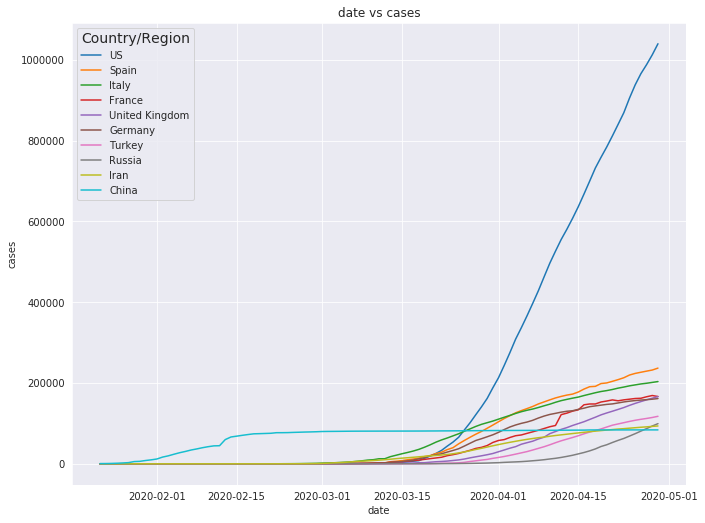

In [2]:
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10)

legend_order = top_ten.sort_values(by=["date", "cases"], ascending=False)["Country/Region"][:10].values

fig, ax = cod.plot_lines(
    data=top_ten,
    x_col="date",
    y_col="cases",
    group_col="Country/Region",
    legend_order=legend_order)

# Cumulative case counts by days since 100 cases

The following code plots the same data above, but with the x axis as the days since each country had 100 cases.

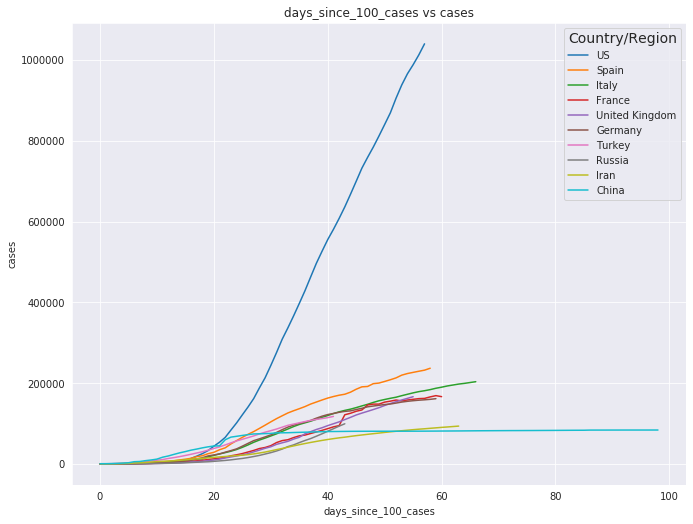

In [3]:
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols="Country/Region",
    x=10)

with_days_since = cod.calc_days_since_min_count(
    data=top_ten,
    data_col="cases",
    region_cols="Country/Region",
    min_count=100)

legend_order = top_ten.sort_values(by=["date", "cases"], ascending=False)["Country/Region"][:10].values

fig, ax = cod.plot_lines(
    data=with_days_since,
    x_col="days_since_100_cases",
    y_col="cases",
    group_col="Country/Region",
    legend_order=legend_order)

# Cumulative cases and daily change on one plot
It's informative to look at the cumulative counts and the daily change in the counts for a country. If you're viewing this interactively, feel free to sub in any particular country you want to look at by editing the `country` variable at the top of the code cell.

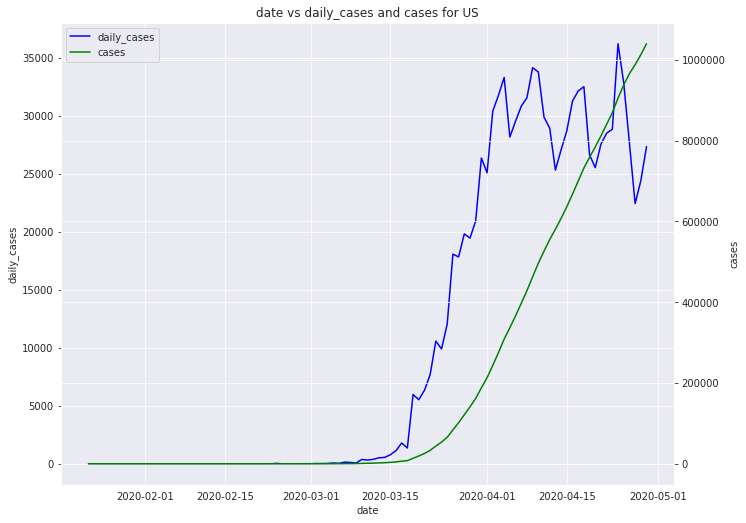

In [4]:
country = "US"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

with_daily = cod.calc_daily_change(
    data=country_df,
    data_cols="cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_cases",
    y2_col="cases",
    title=f"date vs daily_cases and cases for {country}")

# Cumulative cases and daily change, with rolling mean
Sometimes day to day data gets a little jittery. This generates the same plot as the previous example, but with the data smoothed with a centered 5 day rolling mean.

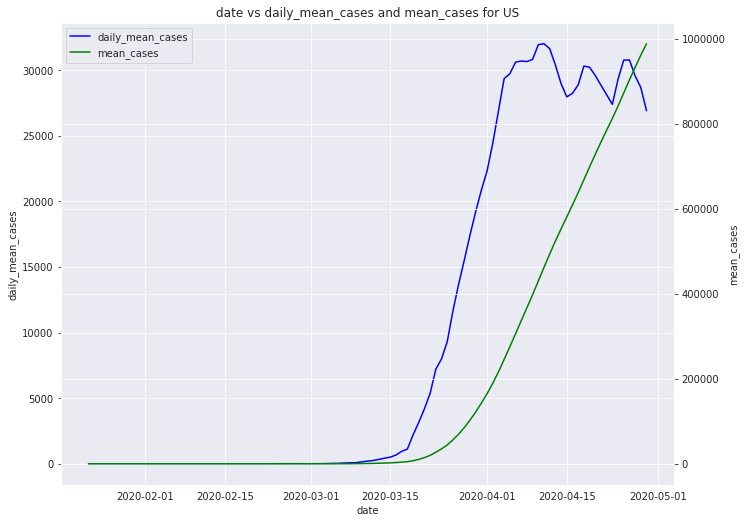

In [5]:
country = "US"
region_group_col = "Country/Region"

country_df = cod.select_regions(
    data=global_df,
    region_col=region_group_col,
    regions=country)

meaned = cod.calc_x_day_rolling_mean(
    data=country_df,
    data_cols="cases",
    region_cols=region_group_col,
    x=5)

with_daily = cod.calc_daily_change(
    data=meaned,
    data_cols="mean_cases",
    region_cols=region_group_col)

fig, ax = cod.plot_lines_two_y(
    data=with_daily,
    x_col="date",
    y1_col="daily_mean_cases",
    y2_col="mean_cases",
    title=f"date vs daily_mean_cases and mean_cases for {country}")

# Custom formatting
Here is the previous plot again, but demonstrating some of the formatting options available in the built in plotting functions.

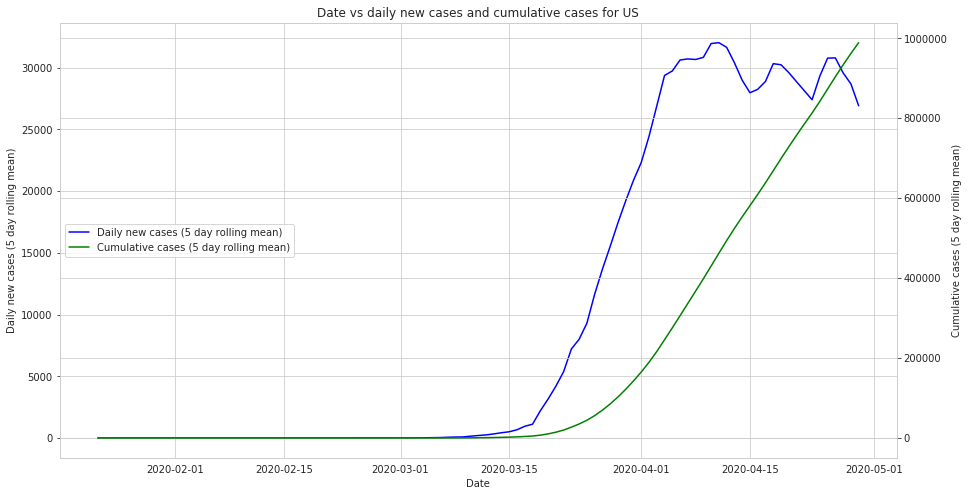

In [6]:
fig, ax = cod.plot_lines_two_y(
    data=with_daily, 
    x_col="date", 
    y1_col="daily_mean_cases", 
    y2_col="mean_cases", 
    title=f"Date vs daily new cases and cumulative cases for {country}", 
    x_lab="Date", 
    y1_lab="Daily new cases (5 day rolling mean)", 
    y2_lab="Cumulative cases (5 day rolling mean)", 
    legend_loc="center left",
    dimensions=(15, 8), 
    seaborn_style="whitegrid")

# Scaling by population (interesting but imperfect comparison)
The tables from JHU come with data on the populations of the countries. Below we use this to scale the counts for each country by that population's country. **However, this is not a perfect method of comparison.** Different countries have different testing rates, so a country that appears to have less cases per capita may just have administered less tests. We nevertheless provide this example as a demonstration of possibilites.

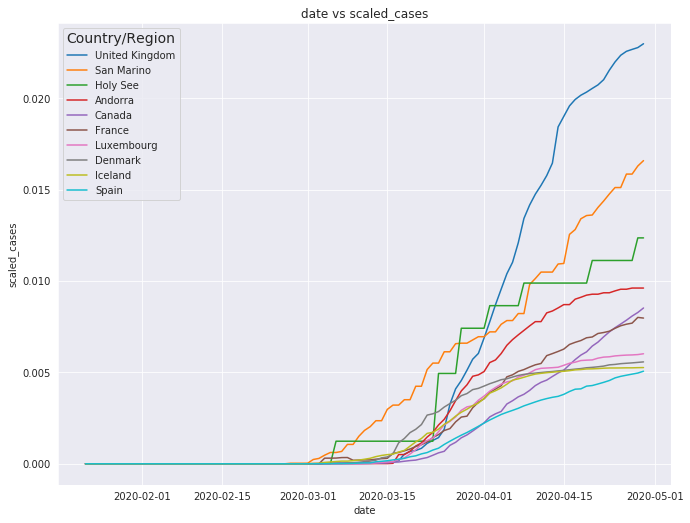

In [7]:
scaled_df = global_df.assign(scaled_cases=global_df["cases"] / global_df["Population"])

top_ten = cod.select_top_x_regions(
    data=scaled_df,
    data_col="scaled_cases",
    region_cols="Country/Region",
    x=10)

legend_order = top_ten.sort_values(by=["date", "scaled_cases"], ascending=False)["Country/Region"][:10].values

fig, ax = cod.plot_lines(
    data=top_ten,
    x_col="date",
    y_col="scaled_cases",
    group_col="Country/Region",
    legend_order=legend_order)